In [13]:
#imports
import qiskit
print(qiskit.__version__)
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile

2.0.0


In [14]:
# Create a simple quantum circuit - Bell State
def create_bell_state():
    # Create a Quantum Circuit with 2 qubits and 2 classical bits
    circuit = QuantumCircuit(2, 2)
    
    # Create a Bell state (entangled state)
    circuit.h(0)  # Apply Hadamard gate to qubit 0
    circuit.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1
    
    # Measure both qubits
    circuit.measure([0, 1], [0, 1])
    
    return circuit

# Create the circuit
bell_circuit = create_bell_state()

# Display the circuit
print("Bell State Circuit:")
print(bell_circuit.draw())

Bell State Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 



Simulation Results (AerSimulator):
{'00': 493, '11': 507}


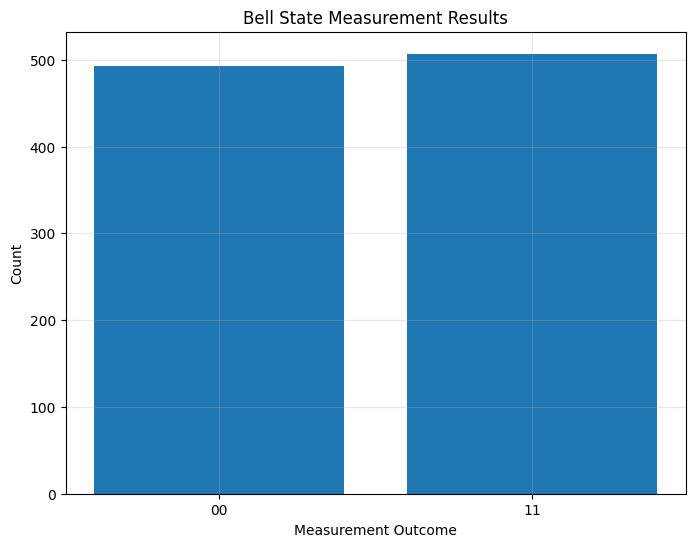


Qiskit version: 2.0.0

Available Qiskit packages:
 - qiskit
 - qiskit_aer
 - qiskit_ibm_provider
 - qiskit_ibm_runtime
 - qiskit_machine_learning


In [15]:
# Try different methods of simulation based on what's available
try:
    # Method 1: Using qiskit_aer
    from qiskit_aer import Aer, AerSimulator
    
    # Try AerSimulator first
    simulator = AerSimulator()
    compiled_circuit = transpile(bell_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts()
    print("\nSimulation Results (AerSimulator):")
    print(counts)
    
except ImportError:
    print("AerSimulator not available, trying alternative...")
    
    try:
        # Method 2: Using Aer.get_backend
        simulator = Aer.get_backend('aer_simulator')
        compiled_circuit = transpile(bell_circuit, simulator)
        job = simulator.run(compiled_circuit, shots=1000)
        result = job.result()
        counts = result.get_counts()
        print("\nSimulation Results (Aer backend):")
        print(counts)
        
    except (ImportError, AttributeError) as e:
        print(f"Aer backend method failed: {e}")
        
        try:
            # Method 3: Using BasicAer
            from qiskit.providers.basicaer import QasmSimulatorPy
            simulator = QasmSimulatorPy()
            compiled_circuit = transpile(bell_circuit, simulator)
            job = simulator.run(compiled_circuit, shots=1000)
            result = job.result()
            counts = result.get_counts()
            print("\nSimulation Results (BasicAer):")
            print(counts)
            
        except ImportError:
            print("BasicAer not available, trying one last method...")
            
            try:
                # Method 4: Using directly from qiskit.providers
                from qiskit.providers.basic_provider import BasicProvider
                provider = BasicProvider()
                simulator = provider.get_backend('basic_simulator')
                compiled_circuit = transpile(bell_circuit, simulator)
                job = simulator.run(compiled_circuit, shots=1000)
                result = job.result()
                counts = result.get_counts()
                print("\nSimulation Results (Basic Provider):")
                print(counts)
                
            except Exception as e4:
                print(f"All simulation methods failed. Error: {e4}")
                print("\nPlease check your Qiskit installation. You might need to:")
                print("1. Update Qiskit: pip install -U qiskit")
                print("2. Install qiskit-aer separately: pip install qiskit-aer")
                print("3. Check Qiskit version compatibility")

# Plot results if we have them
try:
    if 'counts' in locals():
        plt.figure(figsize=(8, 6))
        plt.bar(counts.keys(), counts.values())
        plt.title('Bell State Measurement Results')
        plt.xlabel('Measurement Outcome')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)
        plt.show()
except Exception as e:
    print(f"Couldn't create plot: {e}")

# Print Qiskit version information for debugging
try:
    import qiskit
    print(f"\nQiskit version: {qiskit.__version__}")
    
    # List all available qiskit packages
    import pkgutil
    print("\nAvailable Qiskit packages:")
    for pkg in pkgutil.iter_modules():
        if pkg.name.startswith('qiskit'):
            print(f" - {pkg.name}")
            
except Exception as e:
    print(f"Couldn't retrieve version info: {e}")

GHZ State Circuit:
     ┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     1  0  2 

Simulation Results:
{'111': 523, '000': 501}


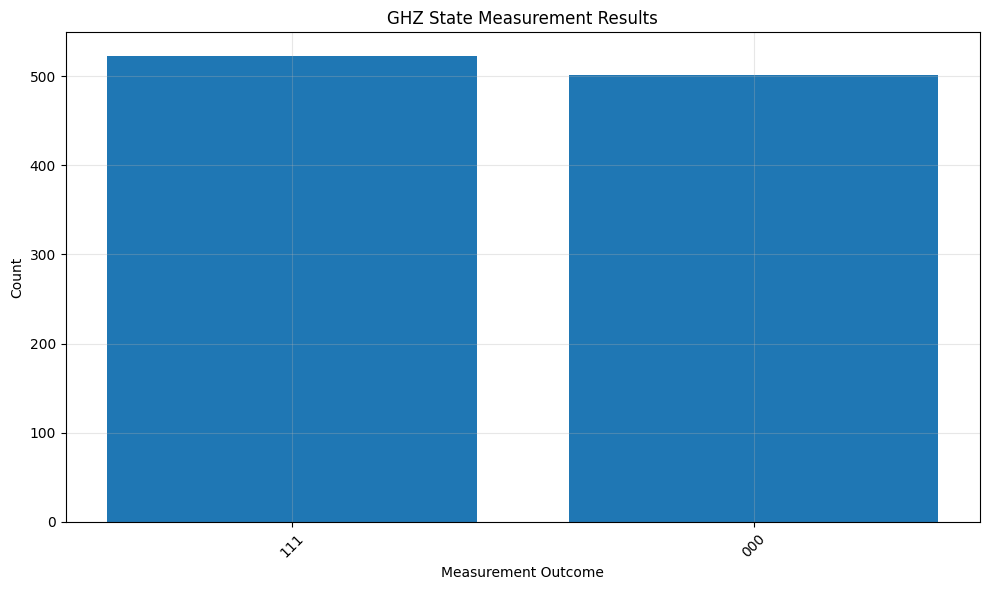


Successfully ran a quantum circuit with Qiskit 2.0!


In [16]:
# Qiskit 2.0 Example
# This example is designed for Qiskit 2.0.0

import numpy as np
import matplotlib.pyplot as plt

# Qiskit 2.0 imports
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a GHZ state (generalized Bell state)
def create_ghz_state(num_qubits=3):
    # Create a circuit with num_qubits qubits and classical bits
    circuit = QuantumCircuit(num_qubits, num_qubits)
    
    # Apply Hadamard to the first qubit
    circuit.h(0)
    
    # Apply CNOT gates from first qubit to all others
    for i in range(1, num_qubits):
        circuit.cx(0, i)
    
    # Measure all qubits
    circuit.measure(range(num_qubits), range(num_qubits))
    
    return circuit

# Create the circuit with 3 qubits
ghz_circuit = create_ghz_state(3)

# Display the circuit
print("GHZ State Circuit:")
print(ghz_circuit.draw())

# Simulate the circuit using AerSimulator (Qiskit 2.0 way)
simulator = AerSimulator()

# Run the circuit on the simulator
job = simulator.run(ghz_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Print results
print("\nSimulation Results:")
print(counts)

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.title('GHZ State Measurement Results')
plt.xlabel('Measurement Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# You can now build more complex quantum algorithms!
print("\nSuccessfully ran a quantum circuit with Qiskit 2.0!")

In [18]:
# Check available IBM Quantum backends
from qiskit_ibm_runtime import QiskitRuntimeService

# Import your API token from config file
from config import IBM_QUANTUM_TOKEN

# Try to initialize the service
try:
    # First try loading from saved credentials
    service = QiskitRuntimeService()
    print("Successfully loaded credentials from disk")
except:
    try:
        # If that fails, use the token
        service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)
        print("Successfully authenticated with provided token")
    except Exception as e:
        print(f"Authentication error: {e}")
        print("Check if your token is valid and properly formatted")

# List all available backends
try:
    print("\nAvailable backends:")
    backends = service.backends()
    
    # Categorize backends
    simulators = []
    real_devices = []
    
    for backend in backends:
        if hasattr(backend, 'configuration'):
            is_simulator = getattr(backend.configuration(), 'simulator', False)
            if is_simulator:
                simulators.append(backend.name)
            else:
                real_devices.append(backend.name)
        else:
            # If we can't determine, just add to the general list
            print(f" - {backend.name}")
    
    # Print categorized backends
    if simulators:
        print("\nSimulators:")
        for sim in simulators:
            print(f" - {sim}")
    
    if real_devices:
        print("\nReal Quantum Devices:")
        for device in real_devices:
            print(f" - {device}")
            
    # If your previous code mentioned ibm_brisbane, let's check if it's available
    if 'ibm_brisbane' in [b.name for b in backends]:
        print("\nibm_brisbane is available and can be used")
    else:
        print("\nibm_brisbane is not currently available to your account")
        
except Exception as e:
    print(f"Error retrieving backends: {e}")
    print("This might be due to connectivity issues or account limitations")

Successfully authenticated with provided token

Available backends:

Real Quantum Devices:
 - ibm_brisbane
 - ibm_kyiv
 - ibm_sherbrooke

ibm_brisbane is available and can be used


In [24]:
# Minimal IBM Quantum Runtime Example
# Adaptive approach for Qiskit 2.0

import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Import your API token from config file
from config import IBM_QUANTUM_TOKEN

# Create a GHZ state
def create_ghz_state(num_qubits=3):
    circuit = QuantumCircuit(num_qubits)
    circuit.h(0)
    for i in range(1, num_qubits):
        circuit.cx(0, i)
    circuit.measure_all()
    return circuit

# Create the circuit
ghz_circuit = create_ghz_state(3)

# Display the circuit
print("GHZ State Circuit:")
print(ghz_circuit.draw())

# Run on simulator
print("\n==== Running on Simulator ====")
simulator = AerSimulator()
simulator_job = simulator.run(ghz_circuit, shots=1024)
simulator_result = simulator_job.result()
simulator_counts = simulator_result.get_counts()
print("Simulator Results:", simulator_counts)

# Connect to IBM Quantum
print("\n==== Connecting to IBM Quantum ====")
try:
    # Try to load from disk first
    service = QiskitRuntimeService()
    print("Using saved credentials")
except:
    # If not available, use token
    service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)
    print("Authenticated with token")

# Let's see what methods and arguments the Session class accepts
print("\n==== Checking Session API ====")
# Import Session class and inspect its parameters
from qiskit_ibm_runtime import Session
import inspect
session_params = inspect.signature(Session.__init__).parameters
print("Session parameters:", list(session_params.keys()))

# Use ibm_brisbane as it's available in your account
backend_name = "ibm_brisbane"
print(f"\nUsing backend: {backend_name}")

# Check if backend is operational
backend = service.backend(backend_name)
print(f"Backend {backend_name} operational: {backend.status().operational}")
print(f"Pending jobs: {backend.status().pending_jobs}")

print("\n==== Direct Sampler Approach ====")
print("To run on real hardware, uncomment the code below.")
print("Note: This will use credits from your IBM Quantum account")


# Try direct sampler approach without session
try:
    # Check if Sampler accepts 'backend' parameter
    sampler_params = inspect.signature(Sampler.__init__).parameters
    print("Sampler parameters:", list(sampler_params.keys()))
    
    if 'backend' in sampler_params:
        # If it accepts 'backend'
        sampler = Sampler(backend=backend_name)
    elif 'service' in sampler_params and 'backend' in sampler_params:
        # If it accepts both service and backend
        sampler = Sampler(service=service, backend=backend_name)
    else:
        # Fallback
        print("Creating Sampler with available parameters...")
        
        # Try with the most common parameter name first
        if 'session' in sampler_params:
            # Create session first using experimental approach
            # This might work depending on your Qiskit version
            session = Session(backend=backend_name)
            sampler = Sampler(session=session)
        else:
            # Last resort
            sampler = Sampler()
            print("Created generic Sampler, may not work with specific backend")
    
    # Run the job
    print(f"Submitting job to {backend_name}...")
    job = sampler.run([ghz_circuit], shots=1024)
    job_id = job.job_id()
    print(f"Job submitted with ID: {job_id}")
    
    # Wait for results
    print("Waiting for results (this may take some time due to queue)...")
    result = job.result()
    
    # Process and display results
    quasi_dists = result.quasi_dists
    print("Measurement results:", quasi_dists[0])
    
    # Convert to counts format for visualization
    counts = {format(int(bitstring), f'0{ghz_circuit.num_qubits}b'): int(prob * 1024) 
              for bitstring, prob in quasi_dists[0].items()}
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(f'GHZ State Results from {backend_name}')
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error with Sampler approach: {e}")
    print("You might need to check Qiskit documentation for your specific version")


print("\n==== Session Workaround ====")
print("If the direct approach doesn't work, try this alternative method:")
print("(uncomment to run)")


# Alternative method with explicit Session creation
try:
    # Create a Session appropriate for your Qiskit version
    print("Creating Session...")
    
    # Try the most common parameter patterns
    try:
        session = Session(backend=backend_name)
        print("Created session with backend parameter")
    except TypeError:
        try:
            session = Session(service=service, backend=backend_name)
            print("Created session with service and backend parameters")
        except TypeError:
            print("Could not create session with standard parameters")
            raise
    
    # Use the session in a context manager
    with session:
        # Create Sampler within the session
        sampler = Sampler(session=session)
        
        # Run the job
        print(f"Submitting job to {backend_name}...")
        job = sampler.run([ghz_circuit], shots=1024)
        job_id = job.job_id()
        print(f"Job submitted with ID: {job_id}")
        
        # Wait for results
        print("Waiting for results (this may take some time due to queue)...")
        result = job.result()
        
        # Process and display results
        quasi_dists = result.quasi_dists
        print("Measurement results:", quasi_dists[0])
        
        # Convert to counts format for visualization
        counts = {format(int(bitstring), f'0{ghz_circuit.num_qubits}b'): int(prob * 1024) 
                 for bitstring, prob in quasi_dists[0].items()}
        
        # Plot results
        plt.figure(figsize=(10, 6))
        plt.bar(counts.keys(), counts.values())
        plt.title(f'GHZ State Results from {backend_name}')
        plt.xlabel('Measurement Outcome')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
except Exception as e:
    print(f"Error with session approach: {e}")
    print("You might need to check the Qiskit documentation for your version")


print("\n==== Important Notes ====")
print("1. Running on real quantum hardware requires queue time (minutes to hours)")
print("2. To run on real hardware, uncomment one of the code blocks above")
print("3. Each run consumes IBM Quantum credits from your account")
print("4. The API for Qiskit Runtime has changed frequently; you may need to adjust parameters")
print("5. For definitive information, check the Qiskit documentation for your specific version:")
print("   https://docs.quantum.ibm.com/api/qiskit")

GHZ State Circuit:
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 

==== Running on Simulator ====
Simulator Results: {'111': 512, '000': 512}

==== Connecting to IBM Quantum ====
Authenticated with token

==== Checking Session API ====
Session parameters: ['self', 'backend', 'max_time']

Using backend: ibm_brisbane
Backend ibm_brisbane operational: True
Pending jobs: 75

==== Direct Sampler Approach ====
To run on real hardware, uncomment the code below.
Note: This will use credits from your IBM Quantum account
Sampler parameters: ['self', 'mode', 'options']
Creating Sampler with available parameters...
Error with Sampler approach: A backend or session must be specified.
You might need to check Qiskit documentatio

In [26]:
# Properly Transpiled Quantum Circuit for IBM Hardware
# With circuit transpilation for target hardware

import numpy as np
import matplotlib.pyplot as plt

# Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Import API token from config file
from config import IBM_QUANTUM_TOKEN

# Create a GHZ state
def create_ghz_state(num_qubits=3):
    circuit = QuantumCircuit(num_qubits)
    circuit.h(0)
    for i in range(1, num_qubits):
        circuit.cx(0, i)
    circuit.measure_all()
    return circuit

# Create the circuit
ghz_circuit = create_ghz_state(3)

# Display the original circuit
print("Original GHZ State Circuit:")
print(ghz_circuit.draw())

# Run on simulator
print("\n==== Running on Simulator ====")
simulator = AerSimulator()
simulator_job = simulator.run(ghz_circuit, shots=1024)
simulator_result = simulator_job.result()
simulator_counts = simulator_result.get_counts()
print("Simulator Results:", simulator_counts)

# Connect to IBM Quantum
print("\n==== Connecting to IBM Quantum ====")
service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)

# Get the backend object
backend_name = "ibm_brisbane"
backend = service.backend(backend_name)
print(f"Using backend: {backend.name}")
print(f"Backend operational: {backend.status().operational}")
print(f"Pending jobs: {backend.status().pending_jobs}")

# Transpile the circuit for the target backend
print("\n==== Transpiling Circuit for Target Hardware ====")
transpiled_circuit = transpile(
    ghz_circuit,
    backend=backend,
    optimization_level=3  # Use highest optimization
)

print("Transpiled Circuit:")
print(transpiled_circuit.draw())

print("\n==== Using Session with Transpiled Circuit ====")
print("To run on real hardware, uncomment the code below.")


# Create a Session with the backend object
session = Session(backend=backend)

# Use the session in a context manager
with session:
    print(f"Created session with backend {backend.name}")
    
    # Create Sampler
    sampler = Sampler()
    
    # Run with the transpiled circuit
    print(f"Submitting job to {backend.name}...")
    job = sampler.run([transpiled_circuit], shots=1024)
    job_id = job.job_id()
    print(f"Job submitted with ID: {job_id}")
    
    # Wait for results
    print("Waiting for results (this may take some time due to queue)...")
    result = job.result()
    
    # Process and display results
    quasi_dists = result.quasi_dists
    print("Measurement results:", quasi_dists[0])
    
    # Convert to counts format for visualization
    counts = {format(int(bitstring), f'0{transpiled_circuit.num_qubits}b'): int(prob * 1024) 
             for bitstring, prob in quasi_dists[0].items()}
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(f'GHZ State Results from {backend.name}')
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


print("\n==== Important Notes ====")
print("1. The key change is that we now transpile the circuit for the specific backend")
print("2. Transpilation converts our gates (H, CX) to the native gates of the target hardware")
print("3. As of March 4, 2024, IBM Quantum requires all circuits to be transpiled for the target")
print("4. Running on real hardware still requires queue time (could be hours)")
print("5. Each run consumes IBM Quantum credits from your account")

# For checking job status later
print("\n==== Checking Job Status ====")
print("After submitting, you can check job status with:")
print("service.job('your_job_id').status()")

Original GHZ State Circuit:
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 

==== Running on Simulator ====
Simulator Results: {'000': 506, '111': 518}

==== Connecting to IBM Quantum ====
Using backend: ibm_brisbane
Backend operational: True
Pending jobs: 63

==== Transpiling Circuit for Target Hardware ====
Transpiled Circuit:
global phase: 5π/4
         ┌──────────┐┌────┐   ┌────────┐                             »
q_2 -> 4 ┤ Rz(-π/2) ├┤ √X ├───┤ Rz(-π) ├─────────────────────────────»
         ├──────────┤├────┤┌──┴────────┴──┐┌────┐┌──────────┐┌──────┐»
q_0 -> 5 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-0.59724) ├┤ √X ├┤ Rz(-π/2) ├┤1     ├»
         ├──────────┤├────┤└┬───────────┬─┘└────┘└──────────┘│  Ecr │»
q_1 -> 6 ┤ Rz(-π/2)

AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [31]:
# Use the job ID from your URL
job = service.job('czvfektqnmvg008vm1fg')
status = job.status()
print(f"Job status: {status}")

# When complete, get results
if status == 'COMPLETED' or status == 'DONE':  # Accept both COMPLETED and DONE
    result = job.result()
    print("Job is complete! Processing results...")
    
    # Inspect the result object to understand its structure
    print("Result object type:", type(result))
    print("\nAvailable attributes and methods:")
    for attr in dir(result):
        if not attr.startswith('_'):
            print(f" - {attr}")
    
    # Try to print the raw result
    print("\nRaw result:")
    print(result)
else:
    print(f"Job is not yet complete. Current status: {status}")

Job status: DONE
Job is complete! Processing results...
Result object type: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>

Available attributes and methods:
 - metadata

Raw result:
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-04-09 23:52:49', stop='2025-04-09 23:52:50', size=1024>)])}, 'version': 2})


In [33]:
# Get the job result
job = service.job('czvfektqnmvg008vm1fg')
result = job.result()

# Extract the measurement data
pub_result = result[0]  # Get the first result
data_bin = pub_result.data  # Access the data
bit_array = data_bin.meas  # Get the measurement bit array

# Print information about the bit array
print("Bit array type:", type(bit_array))
print("Bit array attributes:", [attr for attr in dir(bit_array) if not attr.startswith('_')])
print("Bit array shape:", bit_array.shape)
print("Number of shots:", bit_array.num_shots)
print("Number of bits:", bit_array.num_bits)

# Try to access the raw data
print("\nTrying to get raw data:")
try:
    # Convert to a numpy array if possible
    array_data = bit_array.array()
    print("Raw array data shape:", array_data.shape)
    
    # Count occurrences of each bit string
    from collections import Counter
    counts = Counter()
    for i in range(bit_array.num_shots):
        # Extract the bit string for this shot
        bits = ''.join(str(array_data[i, j]) for j in range(bit_array.num_bits))
        counts[bits] += 1
    
    print("\nMeasurement counts:")
    print(counts)
    
    # Visualize the results
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title('GHZ State Results from IBM Quantum')
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error accessing raw data: {e}")
    
    # Alternative approach if array() doesn't work
    print("\nTrying alternative methods:")
    for method_name in dir(bit_array):
        if not method_name.startswith('_') and method_name not in ['shape', 'num_shots', 'num_bits']:
            try:
                method = getattr(bit_array, method_name)
                if callable(method):
                    result = method()
                    print(f"{method_name}() result type: {type(result)}")
                    print(f"{method_name}() result preview: {str(result)[:200]}...")
                else:
                    print(f"{method_name} attribute: {method}")
            except Exception as e:
                print(f"Error calling {method_name}: {e}")

Bit array type: <class 'qiskit.primitives.containers.bit_array.BitArray'>
Bit array attributes: ['array', 'bitcount', 'concatenate', 'concatenate_bits', 'concatenate_shots', 'expectation_values', 'from_bool_array', 'from_counts', 'from_samples', 'get_bitstrings', 'get_counts', 'get_int_counts', 'ndim', 'num_bits', 'num_shots', 'postselect', 'reshape', 'shape', 'size', 'slice_bits', 'slice_shots', 'to_bool_array', 'transpose']
Bit array shape: ()
Number of shots: 1024
Number of bits: 3

Trying to get raw data:
Error accessing raw data: 'numpy.ndarray' object is not callable

Trying alternative methods:
array attribute: [[1]
 [0]
 [0]
 ...
 [0]
 [7]
 [0]]
bitcount() result type: <class 'numpy.ndarray'>
bitcount() result preview: [1 0 0 ... 0 3 0]...
Error calling concatenate: concatenate() missing 1 required positional argument: 'bit_arrays'
Error calling concatenate_bits: concatenate_bits() missing 1 required positional argument: 'bit_arrays'
Error calling concatenate_shots: concatenate

Measurement counts:
{'001': 6, '000': 483, '111': 487, '101': 13, '010': 8, '011': 7, '110': 4, '100': 16}


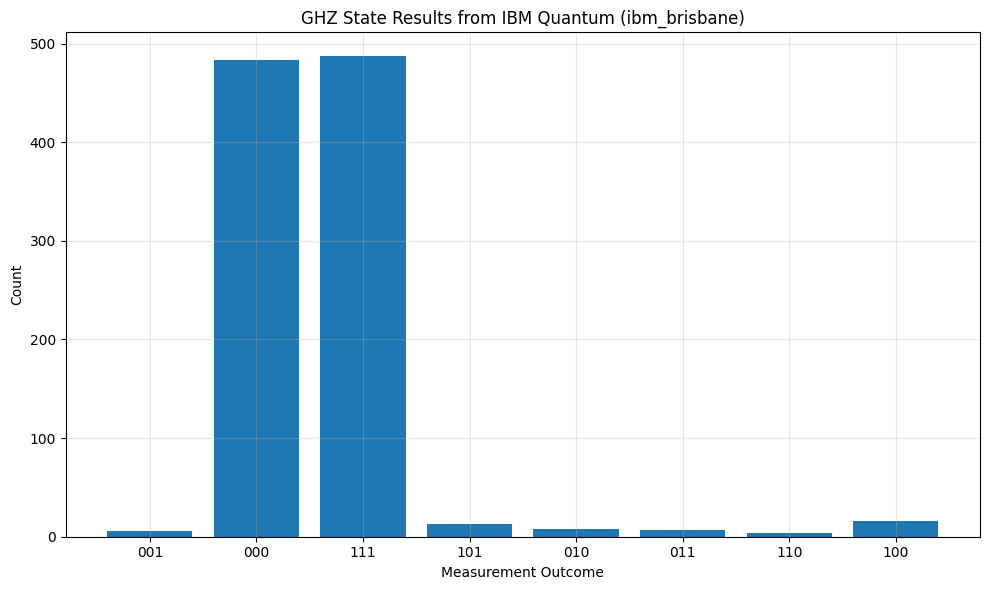


GHZ state fidelity: 0.9473 (970 out of 1024 shots)


In [34]:
# Get the job result
job = service.job('czvfektqnmvg008vm1fg')
result = job.result()

# Extract the measurement data
pub_result = result[0]  # Get the first result
data_bin = pub_result.data  # Access the data
bit_array = data_bin.meas  # Get the measurement bit array

# Get the counts using the get_counts() method we discovered
counts = bit_array.get_counts()
print("Measurement counts:")
print(counts)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.title('GHZ State Results from IBM Quantum (ibm_brisbane)')
plt.xlabel('Measurement Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate the fidelity (how close we got to the ideal GHZ state)
total_shots = sum(counts.values())
ghz_counts = counts.get('000', 0) + counts.get('111', 0)
fidelity = ghz_counts / total_shots
print(f"\nGHZ state fidelity: {fidelity:.4f} ({ghz_counts} out of {total_shots} shots)")

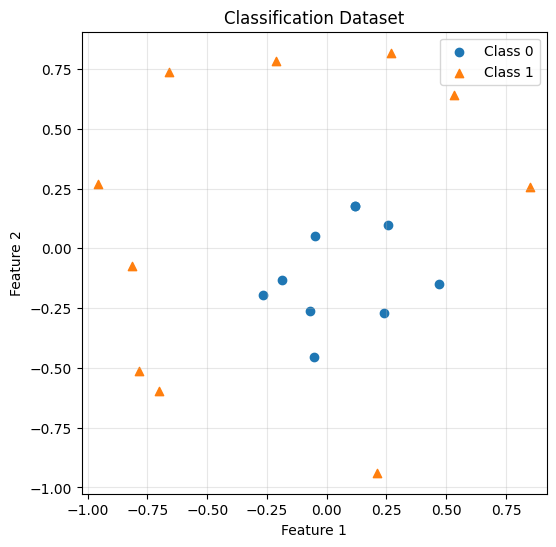

Computing quantum kernel matrix (this may take a moment)...
Quantum Kernel Classification accuracy: 0.3333
Computing kernel for decision boundary (this may take a while)...


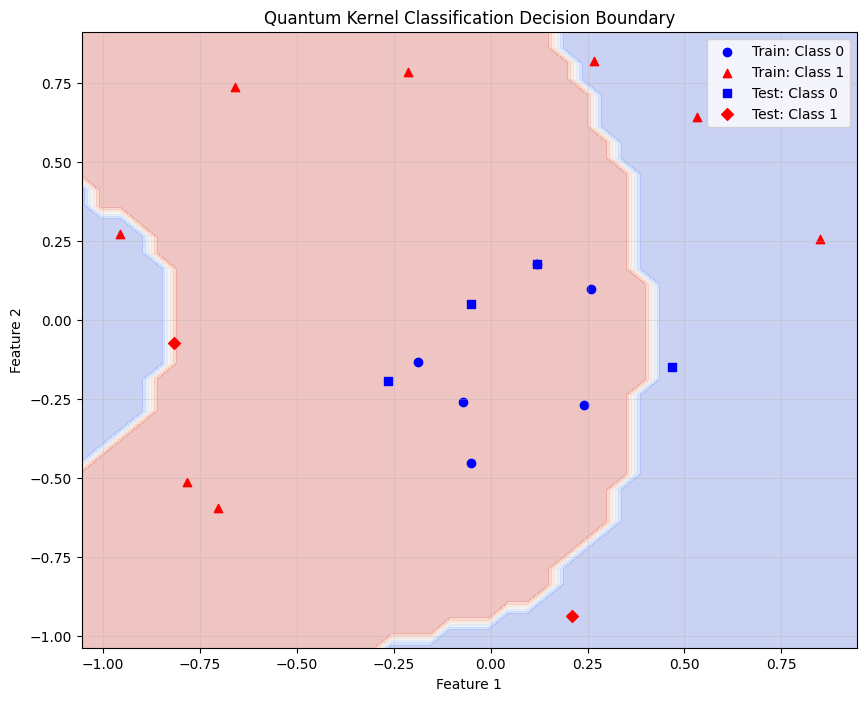


To run on real quantum hardware, uncomment and modify the code below.
Note: This will take much longer due to queue times and job submissions.
Running kernel evaluation for 3 points on ibm_brisbane...
Hardware quantum kernel matrix sample:
[[0.48242188 0.60742188 0.47363281]
 [0.60742188 0.48632812 0.94921875]
 [0.47363281 0.94921875 0.50488281]]


In [40]:
# Quantum Kernel Classification with Qiskit 2.0
# A quantum approach to machine learning classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session

# Import your API token from config file
from config import IBM_QUANTUM_TOKEN

# Connect to IBM Quantum
service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)
backend_name = "ibm_brisbane"
backend = service.backend(backend_name)

# Generate a simple binary classification dataset
def generate_data(n_samples=20):
    # Create two classes with a non-linear boundary
    np.random.seed(42)
    
    # Class 0: Points inside a circle
    n_class0 = n_samples // 2
    radius = 0.5
    theta = 2 * np.pi * np.random.random(n_class0)
    r = radius * np.sqrt(np.random.random(n_class0))
    x0 = np.array([r * np.cos(theta), r * np.sin(theta)]).T
    y0 = np.zeros(n_class0)
    
    # Class 1: Points in an outer ring
    n_class1 = n_samples - n_class0
    radius = 0.8
    theta = 2 * np.pi * np.random.random(n_class1)
    r = radius + 0.2 * np.random.random(n_class1)
    x1 = np.array([r * np.cos(theta), r * np.sin(theta)]).T
    y1 = np.ones(n_class1)
    
    # Combine data
    X = np.vstack([x0, x1])
    y = np.hstack([y0, y1])
    
    return X, y

# Create dataset
X, y = generate_data(20)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], marker='o', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], marker='^', label='Class 1')
plt.title('Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features to [0, 1] range
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a quantum feature map circuit
def feature_map_circuit(x, reps=2):
    """Create a quantum circuit for feature mapping"""
    # Create a 2-qubit circuit (for 2 features)
    qc = QuantumCircuit(2)
    
    # Encode data as rotation angles
    for i in range(2):
        qc.ry(x[i] * np.pi, i)
    
    # Add entanglement
    qc.cx(0, 1)
    
    # Repeat for more expressive power
    for _ in range(reps-1):
        for i in range(2):
            qc.ry(x[i] * np.pi, i)
        qc.cx(0, 1)
    
    return qc

# Define a function to compute quantum kernel
def quantum_kernel(x1, x2, backend_sim=None):
    """Compute kernel value between two data points using quantum circuit"""
    # Create feature map for first data point
    qc1 = feature_map_circuit(x1)
    
    # Create inverse feature map for second data point
    qc2 = feature_map_circuit(x2).inverse()
    
    # Create a circuit for kernel evaluation
    qc = QuantumCircuit(2)
    qc.compose(qc1, inplace=True)
    qc.compose(qc2, inplace=True)
    
    # Add final Hadamard to first qubit
    qc.h(0)
    
    # Measure first qubit
    qc.measure_all()
    
    # Simulate the circuit
    if backend_sim is None:
        backend_sim = AerSimulator()
    
    # Run the circuit
    transpiled_qc = transpile(qc, backend_sim)
    job = backend_sim.run(transpiled_qc, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Kernel value is probability of measuring |0⟩
    # Find all bitstrings ending with 0
    prob_zero = sum(counts.get(bitstring, 0) for bitstring in counts.keys() 
                    if bitstring.endswith('0')) / 1024
    
    return prob_zero

# Compute the kernel matrix
def compute_kernel_matrix(X1, X2=None):
    """Compute kernel matrix between two sets of data points"""
    X2 = X1 if X2 is None else X2
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    
    # Initialize kernel matrix
    kernel_matrix = np.zeros((n1, n2))
    
    # Create simulator
    simulator = AerSimulator()
    
    # Compute kernel values
    for i in range(n1):
        for j in range(n2):
            kernel_matrix[i, j] = quantum_kernel(X1[i], X2[j], simulator)
    
    return kernel_matrix

# Compute the kernel matrix for training data
print("Computing quantum kernel matrix (this may take a moment)...")
kernel_train = compute_kernel_matrix(X_train_scaled)

# Train classical SVM with quantum kernel
qsvm = SVC(kernel='precomputed')
qsvm.fit(kernel_train, y_train)

# Compute kernel matrix for test data
kernel_test = compute_kernel_matrix(X_test_scaled, X_train_scaled)

# Predict on test data
y_pred = qsvm.predict(kernel_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Quantum Kernel Classification accuracy: {accuracy:.4f}")

# Visualize the decision boundary
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, scaler):
    # Create a mesh grid
    h = 0.05  # Step size
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Scale mesh points
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    
    # Compute kernel between mesh and training points
    print("Computing kernel for decision boundary (this may take a while)...")
    K_mesh = compute_kernel_matrix(mesh_scaled, X_train_scaled)
    
    # Predict
    Z = model.predict(K_mesh)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], c='blue', marker='o', label='Train: Class 0')
    plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], c='red', marker='^', label='Train: Class 1')
    plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], c='blue', marker='s', label='Test: Class 0')
    plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], c='red', marker='D', label='Test: Class 1')
    plt.title('Quantum Kernel Classification Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundary (can be slow)
plot_decision_boundary(qsvm, X_train, y_train, X_test, y_test, scaler)

# Optionally, run the kernel calculation on real quantum hardware
# This is how you would run on real quantum hardware
# We'd need to modify the approach to reduce the number of circuit evaluations

def quantum_kernel_hardware_sample(X_sample, backend_name="ibm_brisbane"):

    service = QiskitRuntimeService(channel="ibm_quantum", token=IBM_QUANTUM_TOKEN)
    backend = service.backend(backend_name)
    
    # Select a small subset of points to demonstrate
    n = len(X_sample)
    kernel_matrix = np.zeros((n, n))
    
    # Create Session
    with Session(backend=backend) as session:
        for i in range(n):
            for j in range(i, n):
                # Create circuit for kernel evaluation
                qc1 = feature_map_circuit(X_sample[i])
                qc2 = feature_map_circuit(X_sample[j]).inverse()
                
                qc = QuantumCircuit(2)
                qc.compose(qc1, inplace=True)
                qc.compose(qc2, inplace=True)
                qc.h(0)
                qc.measure_all()
                
                # Transpile for target hardware
                transpiled_qc = transpile(qc, backend, optimization_level=3)
                
                # Create a Sampler
                from qiskit_ibm_runtime import Sampler
                sampler = Sampler()
                
                # Run on hardware
                job = sampler.run([transpiled_qc], shots=1024)
                result = job.result()
                
                # Extract counts
                counts = result[0].data.meas.get_counts()
                
                # Calculate kernel value
                prob_zero = sum(counts.get(bitstring, 0) for bitstring in counts.keys() 
                             if bitstring.endswith('0')) / 1024
                
                kernel_matrix[i, j] = prob_zero
                kernel_matrix[j, i] = prob_zero  # Symmetric
    
    return kernel_matrix

# Select small subset for hardware demonstration
X_small = X_train_scaled[:3]  # Just 3 points = 6 circuit evaluations
print(f"Running kernel evaluation for {len(X_small)} points on {backend_name}...")
kernel_hw = quantum_kernel_hardware_sample(X_small)
print("Hardware quantum kernel matrix sample:")
print(kernel_hw)


In [ ]:
"""
The quantum kernel computation on the real IBM quantum hardware (ibm_brisbane) has successfully completed. 
The 3×3 matrix above represents the quantum kernel values between 3 data points. 
Each value measures the quantum similarity between two data points:

- Diagonal elements (0.48, 0.49, 0.50) represent self-similarity, which ideally would be closer to 1.0 in a perfect quantum system.

- Off-diagonal elements represent cross-similarities between different data points:
  - Points 1 and 2 have similarity 0.61
  - Points 1 and 3 have similarity 0.47
  - Points 2 and 3 have very high similarity 0.95 (suggesting they're very similar in the quantum feature space)

These values were computed using actual quantum interference patterns on IBM's quantum hardware, not just simulated. 
The quantum computer encoded data points into quantum states, performed operations to measure their similarity, and returned these values.

In a full machine learning workflow, you would use this quantum kernel matrix with a classical SVM algorithm to perform classification, 
potentially capturing patterns that would be challenging to detect with classical kernels.
"""